In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Use some real data - Jiang et al

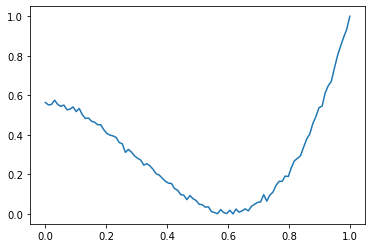

In [2]:
x = np.arange(100)
y = 0.05*x**3 - 4.5*x**2 + np.random.normal(loc = 0, scale = 100, size = 100)

y = (y - y.min()) / (y.max() - y.min())
x = (x - x.min()) / (x.max() - x.min())

plt.plot(x, y)

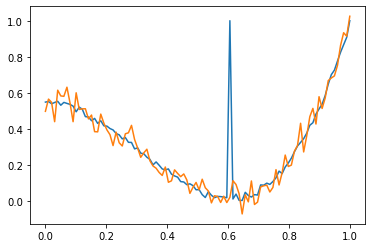

In [3]:
x = np.arange(100)
y = 0.05*x**3 - 4.5*x**2 + np.random.normal(loc = 0, scale = 100, size = 100)

y = (y - y.min()) / (y.max() - y.min())
x = (x - x.min()) / (x.max() - x.min())

y_test = y.copy()
y_train = y.copy()

y_train[60] = 1
y_test = y_test + np.random.normal(loc = 0, scale = 0.05, size = 100)

plt.plot(x, y_train)
plt.plot(x, y_test)

# Define a simple model

In [4]:
class lm(torch.nn.Module):
    
    def __init__(self):
        super(lm, self).__init__()
        self.fc1 = torch.nn.Linear(1, 1000)
        self.fc2 = torch.nn.Linear(1000, 1)
        
    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return(x)

# Make it
np.random.seed(123)
torch.manual_seed(123)
model = lm()

In [5]:
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

In [6]:
x = torch.from_numpy(x).float().unsqueeze(1)

y_train = torch.from_numpy(y_train).float().unsqueeze(1)
y_test = torch.from_numpy(y_test).float().unsqueeze(1)

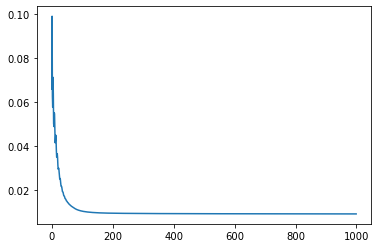

In [7]:
loss_ls = []
for i in range(1000):
    out = model(x)
    loss = loss_fn(out, y_train)
    optimizer.zero_grad()
    loss.backward()
    loss_ls.append(loss.item())
    optimizer.step()
plt.plot(loss_ls)

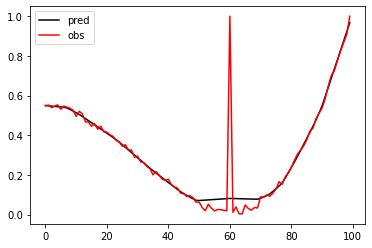

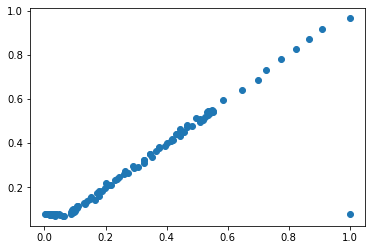

In [8]:
plt.plot(out.detach(), color = 'black', label = 'pred')
plt.plot(y_train, color = 'red', label = 'obs')
plt.legend()

plt.pause(0.001)
plt.scatter(y_train, out.detach());

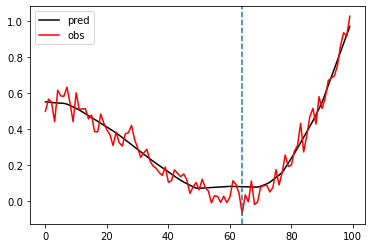

tensor(64)


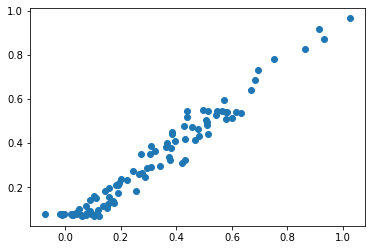

In [9]:
y_hat_test = model(x)

plt.plot(y_hat_test.detach(), color = 'black', label = 'pred')
plt.plot(y_test, color = 'red', label = 'obs')
plt.axvline(np.argmin(y_test), linestyle = '--')
plt.legend()

plt.pause(0.001)
plt.scatter(y_test, y_hat_test.detach());

print(np.argmin(y_test))

# data loaders

In [10]:
# Put together dataloaders
train_data = []
for i in range(len(x)):
    train_data.append([x[i], y_train[i]])

train_loader = torch.utils.data.DataLoader(train_data, batch_size=1, shuffle=False)

In [11]:
# Put together dataloaders
test_data = []
for i in range(len(x)):
    test_data.append([x[i], y_test[i]])

test_loader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=False)

# influence functions

applied to two different test instances (0 and 60)

In [12]:
import sys
sys.path.insert(0, '../../../pytorch_influence_functions/')

In [13]:
import pytorch_influence_functions as ptif

Calc. s_test recursions: [=================================================] 1 / 1
Averaging r-times: [=======================================================] 1 / 1
Calc. influence function: [=============================================] 99 / 100100
Calc. influence function: [============================================] 100 / 100


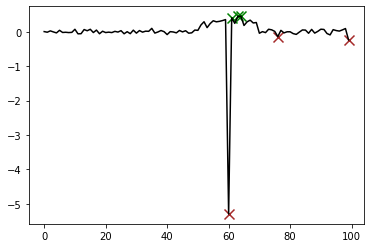

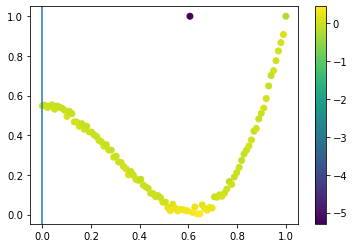

In [14]:
influence0, harmful0, helpful0, test_id_num0 = ptif.calc_influence_function.calc_influence_single(
    model,
    train_loader,
    test_loader,
    0,
    gpu = -1,
    recursion_depth = 1,
    r = 1
)

plt.plot(np.asarray(influence0), color = 'black')
for i in harmful0[:3]:
    plt.scatter(i, influence0[i], color = 'brown', marker = 'x', s = 100)
for i in helpful0[:3]:
    plt.scatter(i, influence0[i], color = 'green', marker = 'x', s = 100)
plt.pause(0.001)

plt.axvline(x[test_id_num0])
plt.scatter(x, y_train, c = influence0)
plt.colorbar();

In [15]:
harmful0[:3], helpful0[:3]

([60, 99, 76], [64, 63, 61])

In [17]:
influence60, harmful60, helpful60, test_id_num60 = ptif.calc_influence_function.calc_influence_single(
    model,
    train_loader,
    test_loader,
    60,
    gpu = -1,
    recursion_depth = 1,
    r = 1
)

Calc. s_test recursions: [=================================================] 1 / 1
Averaging r-times: [=======================================================] 1 / 1
Calc. influence function: [=============================================] 99 / 100100
Calc. influence function: [============================================] 100 / 100


In [18]:
harmful60[:3], helpful60[:3]

([60, 99, 76], [64, 63, 61])

In [19]:
harmful60[:3], helpful60[:3]

([60, 99, 76], [64, 63, 61])

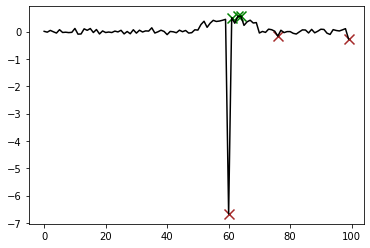

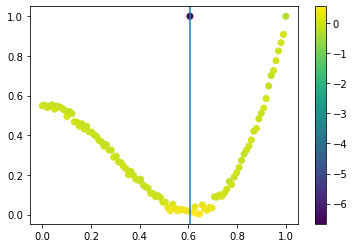

In [20]:
plt.plot(np.asarray(influence60), color = 'black')
for i in harmful60[:3]:
    plt.scatter(i, influence60[i], color = 'brown', marker = 'x', s = 100)
for i in helpful60[:3]:
    plt.scatter(i, influence60[i], color = 'green', marker = 'x', s = 100)
plt.pause(0.001)

plt.axvline(x[test_id_num60])
plt.scatter(x, y_train, c = influence60)
plt.colorbar();

# Whole usage

In [22]:
influence_matrix = np.zeros([len(y_test), len(y_train)])

for i in range(len(y_test)):
    influence_i = ptif.calc_influence_function.calc_influence_single(
        model,
        train_loader,
        test_loader,
        i,
        gpu = -1,
        recursion_depth = 1,
        r = 1
    )
    
    influence_matrix[i, :] = np.asarray(influence_i[0])

Calc. s_test recursions: [=================================================] 1 / 1
Averaging r-times: [=======================================================] 1 / 1
Calc. influence function: [=============================================] 99 / 100100
Calc. influence function: [============================================] 100 / 100
Calc. s_test recursions: [=================================================] 1 / 1
Averaging r-times: [=======================================================] 1 / 1
Calc. influence function: [=============================================] 99 / 100100
Calc. influence function: [============================================] 100 / 100
Calc. s_test recursions: [=================================================] 1 / 1
Averaging r-times: [=======================================================] 1 / 1
Calc. influence function: [=============================================] 99 / 100100
Calc. influence function: [============================================] 100 /

Calc. influence function: [=============================================] 99 / 100100
Calc. influence function: [============================================] 100 / 100
Calc. s_test recursions: [=================================================] 1 / 1
Averaging r-times: [=======================================================] 1 / 1
Calc. influence function: [=============================================] 99 / 100100
Calc. influence function: [============================================] 100 / 100
Calc. s_test recursions: [=================================================] 1 / 1
Averaging r-times: [=======================================================] 1 / 1
Calc. influence function: [=============================================] 99 / 100100
Calc. influence function: [============================================] 100 / 100
Calc. s_test recursions: [=================================================] 1 / 1
Averaging r-times: [=======================================================] 1

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Calc. influence function: [=============================================] 99 / 100100
Calc. influence function: [============================================] 100 / 100
Calc. s_test recursions: [=================================================] 1 / 1
Averaging r-times: [=======================================================] 1 / 1
Calc. influence function: [=============================================] 99 / 100100
Calc. influence function: [============================================] 100 / 100
Calc. s_test recursions: [=================================================] 1 / 1
Averaging r-times: [=======================================================] 1 / 1
Calc. influence function: [=============================================] 99 / 100100
Calc. influence function: [============================================] 100 / 100
Calc. s_test recursions: [=================================================] 1 / 1
Averaging r-times: [=======================================================] 1

Calc. s_test recursions: [=================================================] 1 / 1
Averaging r-times: [=======================================================] 1 / 1
Calc. influence function: [=============================================] 99 / 100100
Calc. influence function: [============================================] 100 / 100
Calc. s_test recursions: [=================================================] 1 / 1
Averaging r-times: [=======================================================] 1 / 1
Calc. influence function: [=============================================] 99 / 100100
Calc. influence function: [============================================] 100 / 100
Calc. s_test recursions: [=================================================] 1 / 1
Averaging r-times: [=======================================================] 1 / 1
Calc. influence function: [=============================================] 99 / 100100
Calc. influence function: [============================================] 100 /

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Calc. influence function: [=============================================] 99 / 100100
Calc. influence function: [============================================] 100 / 100
Calc. s_test recursions: [=================================================] 1 / 1
Averaging r-times: [=======================================================] 1 / 1
Calc. influence function: [=============================================] 99 / 100100
Calc. influence function: [============================================] 100 / 100
Calc. s_test recursions: [=================================================] 1 / 1
Averaging r-times: [=======================================================] 1 / 1
Calc. influence function: [=============================================] 99 / 100100
Calc. influence function: [============================================] 100 / 100
Calc. s_test recursions: [=================================================] 1 / 1
Averaging r-times: [=======================================================] 1

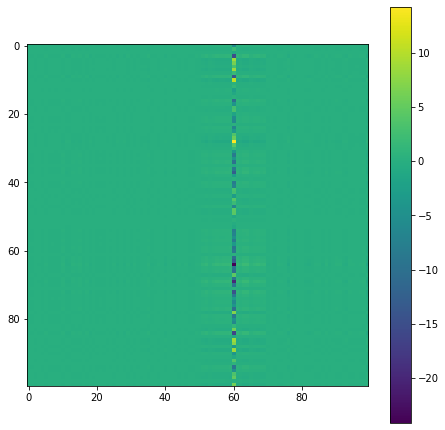

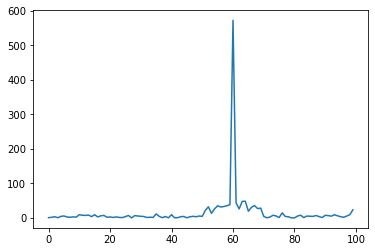

In [23]:
plt.figure(figsize = (7.65,7.65))
plt.imshow(influence_matrix)
plt.colorbar()
plt.pause(0.001)
plt.plot(np.sum(np.abs(influence_matrix), 0));

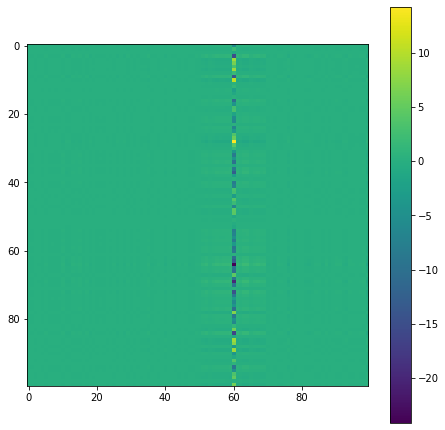

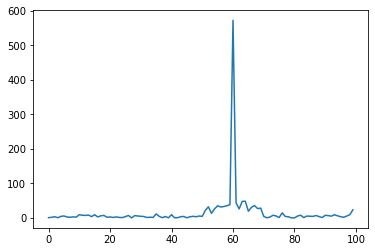

In [24]:
plt.figure(figsize = (7.65,7.65))
plt.imshow(influence_matrix)
plt.colorbar()
plt.pause(0.001)
plt.plot(np.sum(np.abs(influence_matrix), 0));

# Retrain

In [25]:
fixed_x = torch.from_numpy(np.concatenate([x[:60], x[61:]])).float()
fixed_y_train = torch.from_numpy(np.concatenate([y_train[:60], y_train[61:]])).float()

In [26]:
model = lm()
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

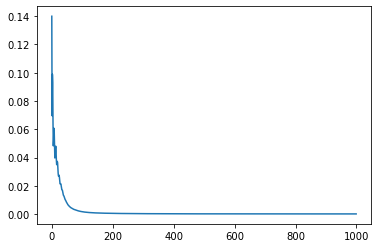

In [27]:
loss_ls = []
for i in range(1000):
    out = model(fixed_x)
    loss = loss_fn(out, fixed_y_train)
    optimizer.zero_grad()
    loss.backward()
    loss_ls.append(loss.item())
    optimizer.step()
plt.plot(loss_ls)

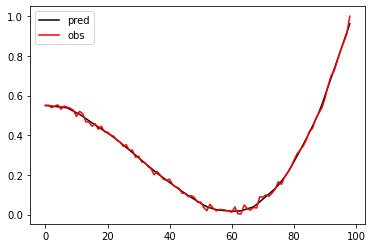

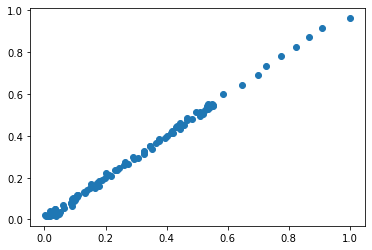

In [28]:
plt.plot(out.detach(), color = 'black', label = 'pred')
plt.plot(fixed_y_train, color = 'red', label = 'obs')
plt.legend()

plt.pause(0.001)
plt.scatter(fixed_y_train, out.detach());

# Conclusion

When observed with the other notebooks, it appears that this method will produce a good answer when given a painfully obvious regression scenario with a simple model, but that isn't seeming to extend to more realistic cases.

Most applications focus on classification, perhaps dealing with classes is an easier situation to discern helpful/harmful points rather than a continuous case? See main notebook for broader reference of fragility of these methods.